# Startup Funding Analysis 

In [1]:
# importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("../Dataset/startup_funding.csv")

In [3]:
df.shape

(2372, 10)

In [4]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [5]:
df['InvestmentType'] = df['InvestmentType'].astype("category")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   SNo               2372 non-null   int64   
 1   Date              2372 non-null   object  
 2   StartupName       2372 non-null   object  
 3   IndustryVertical  2201 non-null   object  
 4   SubVertical       1436 non-null   object  
 5   CityLocation      2193 non-null   object  
 6   InvestorsName     2364 non-null   object  
 7   InvestmentType    2371 non-null   category
 8   AmountInUSD       1525 non-null   object  
 9   Remarks           419 non-null    object  
dtypes: category(1), int64(1), object(8)
memory usage: 169.6+ KB


# Data Cleaning

__Preprocessing__
- Remarks Col: has Mostly null Values (Drop)
- setting Index to sno
- rename Column with easy names
- convert amount to crore in Rs
- date col
- dropna (drop Null values)

In [7]:
#1 drop Remarks Col
df=df.drop(columns=["Remarks"],axis=1)



#2  Index =SNo
df.set_index('SNo',inplace=True)

#3 rename COlumns
df.rename(columns={"StartupName":"startup",
                   "IndustryVertical":'vertical',
                   'SubVertical':'subvertical',
                   'CityLocation':"city",
                   'InvestorsName':'investor',
                   'InvestmentType':'round',
                   'AmountInUSD':"amount"
                   },inplace=True)
#4 convert amount to crore
# first there are so many Nan values change them to 0
df['amount']=df['amount'].fillna('0')
print(df['amount'].isnull().sum())

# now change the type of the amount 
df['amount']=df['amount'].str.replace(",",'')

# Convert the column to numeric (may be float and int)
df['amount']=pd.to_numeric(df['amount'])
df.head(4)


0


,Date,startup,vertical,subvertical,city,investor,round,amount
SNo,,,,,,,,
0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000
1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,0
2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,0
3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000


In [8]:
# converting the amount to crore
def ConverterToCr(dollar):
    inr=dollar * 82.5
    return inr/10000000

df['amount']=df['amount'].apply(ConverterToCr)


In [9]:
df['amount'].iloc[0:3]

SNo
0    10.725
1     0.000
2     0.000
Name: amount, dtype: float64

In [10]:
# 5 date to datetime obj 
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce', dayfirst=True)

__it helps to get the day ,month,year from the date__

In [11]:
df['Date'].dt.month.head()

SNo
0    8.0
1    8.0
2    8.0
3    8.0
4    8.0
Name: Date, dtype: float64

In [12]:
df['Date'].dt.year.head()

SNo
0    2017.0
1    2017.0
2    2017.0
3    2017.0
4    2017.0
Name: Date, dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2372 entries, 0 to 2371
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2367 non-null   datetime64[ns]
 1   startup      2372 non-null   object        
 2   vertical     2201 non-null   object        
 3   subvertical  1436 non-null   object        
 4   city         2193 non-null   object        
 5   investor     2364 non-null   object        
 6   round        2371 non-null   category      
 7   amount       2372 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1), object(5)
memory usage: 150.9+ KB


In [14]:
# 6 drop the missing value rows
df=df.dropna(subset=['Date','vertical','city','investor','round','amount'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2181 entries, 0 to 2200
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2181 non-null   datetime64[ns]
 1   startup      2181 non-null   object        
 2   vertical     2181 non-null   object        
 3   subvertical  1428 non-null   object        
 4   city         2181 non-null   object        
 5   investor     2181 non-null   object        
 6   round        2181 non-null   category      
 7   amount       2181 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1), object(5)
memory usage: 138.8+ KB


# Export this data for Streamlit Version

In [16]:
df.to_csv("Startup_Cleaned.csv",index=False)

# Univariate Analysis

__1. How many startups are there in total?__

In [17]:
Unique_Startups=df['startup'].unique()
print(Unique_Startups)
df['startup'].nunique()

['TouchKin' 'Ethinos' 'Leverage Edu' ... 'Dazo' 'Tradelab' 'PiQube']


1863

__2. Analyze Distribution of Funding Amount__

In [18]:
df['amount'].describe()

count     2181.000000
mean        64.563352
std        442.650269
min          0.000000
25%          0.000000
50%          2.475000
75%         18.975000
max      11550.000000
Name: amount, dtype: float64

(0.0, 300.0)

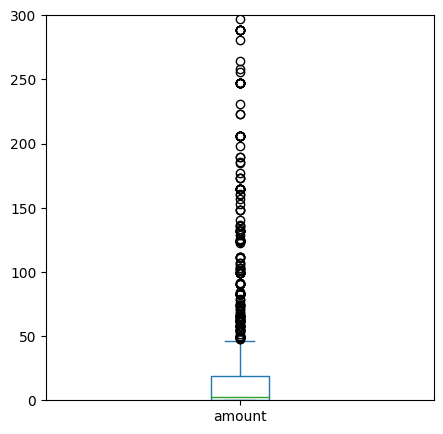

In [19]:

plt.figure(figsize=(5,5))
df['amount'].plot(kind='box')
plt.ylim(0, 300)

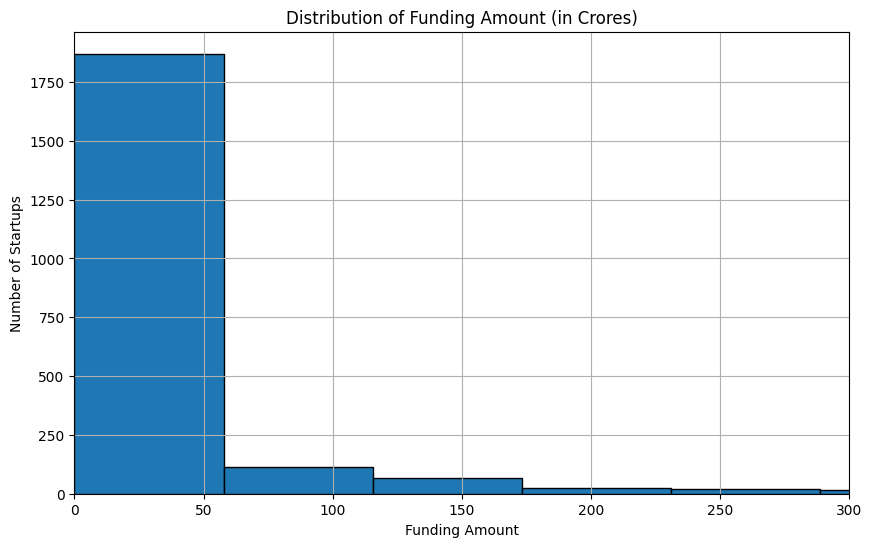

In [20]:
plt.figure(figsize=(10,6))
df['amount'].plot(kind='hist', bins=200, edgecolor='black')
plt.title("Distribution of Funding Amount (in Crores)")
plt.xlim(0, 300) 
plt.xlabel("Funding Amount")
plt.ylabel("Number of Startups")
plt.grid(True)
plt.show()


In [ ]:
"""Most startups got low funding:
The first bar (0-50 Cr) is very tall — this means most startups received less than ₹50 Cr in funding.
Over 1800 startups fall into this bin — that’s the vast majority.


Few startups got large funding:
The bars after ₹50 Cr get very short.
Very few startups received funding over ₹100 Cr, and even fewer over ₹200 Cr.
"""

__3. Top 10 CIties with Most Startups__

In [22]:
df.groupby("city")['startup'].nunique()

city
Agra                       2
Ahmedabad                 32
Bangalore                523
Bangalore / Palo Alto      1
Bangalore / SFO            2
                        ... 
Udaipur                    1
Udupi                      2
Vadodara                   8
Varanasi                   1
bangalore                  1
Name: startup, Length: 70, dtype: int64

In [23]:
df.groupby("city")['startup'].nunique().sort_values(ascending=False).reset_index()

,city,startup
0,Bangalore,523
1,Mumbai,387
2,New Delhi,339
3,Gurgaon,199
4,Pune,78
...,...,...
65,USA,1
66,Udaipur,1
67,USA/India,1
68,Varanasi,1


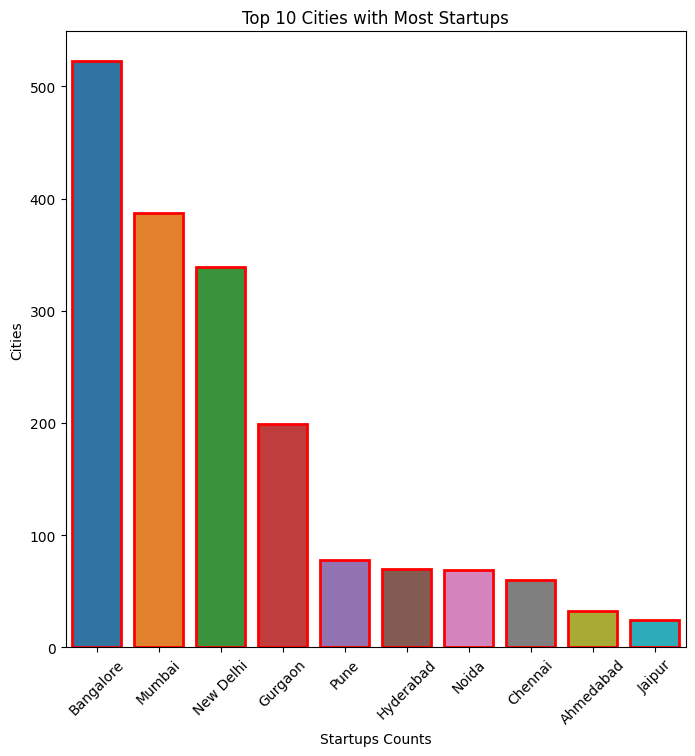

In [24]:
fig=plt.subplots(figsize=(8,8))
top_10_Startup_per_city=df.groupby("city")['startup'].nunique().sort_values(ascending=False).head(10).reset_index()
ax=sns.barplot(data=top_10_Startup_per_city,x='city',y='startup',hue='city',linewidth=2,edgecolor='red')
plt.title("Top 10 Cities with Most Startups")
plt.xlabel("Startups Counts")
plt.ylabel("Cities")
plt.xticks(rotation=45)
plt.show()

__4. Top 10 sectors (vertical) receiving the most funding.__

In [25]:
df['vertical'].value_counts()

vertical
Consumer Internet             765
Technology                    313
eCommerce                     171
ECommerce                      53
Healthcare                     30
                             ... 
Startup Analytics platform      1
Mobile Food Ordering app        1
Financial Markets Software      1
Hiring Analytics platform       1
On-Demand Car services App      1
Name: count, Length: 734, dtype: int64

In [26]:
df.groupby("vertical")['amount'].sum().sort_values(ascending=False)

vertical
Consumer Internet                          31325.551125
eCommerce                                  20152.374000
ECommerce                                  15133.780266
Technology                                  9104.646375
Online Marketplace                          5775.000000
                                               ...     
anonymous bulletin board app                   0.000000
Algorithmic Match Making Platform              0.000000
solar products and services marketplace        0.000000
Activity Based Social Network                  0.000000
360-degree view creating platform              0.000000
Name: amount, Length: 734, dtype: float64

In [27]:
# ECommerce and eCommerce are same but differnt Rows (Change manually )
vertical=df.groupby("vertical")['amount'].sum()
vertical.loc['ECommerce']+=vertical.loc['eCommerce']
vertical.loc['eCommerce']=0
top_10_vertical=vertical.sort_values(ascending=False).head(10).reset_index()
top_10_vertical

,vertical,amount
0,ECommerce,35286.154266
1,Consumer Internet,31325.551125
2,Technology,9104.646375
3,Online Marketplace,5775.000000
4,E-Commerce & M-Commerce platform,5610.000000
5,Car Aggregator & Retail Mobile App,4125.000000
6,Ecommerce Marketplace,4125.000000
7,Cab Aggregator,3300.000000
8,Cab rental Mobile app,1856.250000
9,Logistics,1490.321250


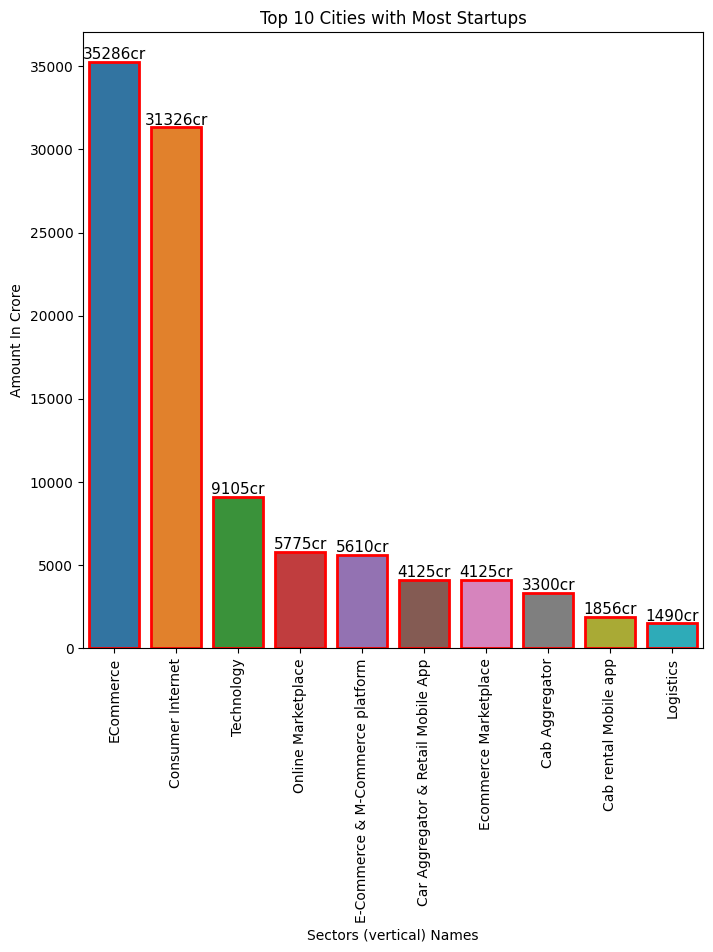

In [194]:
fig=plt.subplots(figsize=(8,8))
ax=sns.barplot(data=top_10_vertical,x='vertical',y='amount',hue='vertical',linewidth=2,edgecolor='red')
plt.title("Top 10 Cities with Most Startups")
plt.xlabel("Sectors (vertical) Names")
plt.ylabel("Amount In Crore")
plt.xticks(rotation=90)
for i in ax.patches:
    height=i.get_height()
    ax.text(
        i.get_x()+i.get_width()/2,
        height,
        f'{height:.0f}cr',
        va='bottom',ha='center',
        fontsize=11
    )
plt.show()

__5. Most common funding rounds.__

In [29]:
df['round'].value_counts()
# Seed Funding 

round
Seed Funding      1201
Private Equity     979
Debt Funding         1
Crowd funding        0
Crowd Funding        0
PrivateEquity        0
SeedFunding          0
Name: count, dtype: int64

__6. Top 10 Frequent Investor__

In [30]:
df['investor'].str.split(",").explode().str.strip().value_counts().reset_index()

,investor,count
0,Sequoia Capital,54
1,Accel Partners,51
2,Indian Angel Network,40
3,Kalaari Capital,39
4,,38
...,...,...
2403,Nexus venture Partners,1
2404,GFC,1
2405,Version One Ventures,1
2406,Nexus Venture Partners and Arena Ventures,1


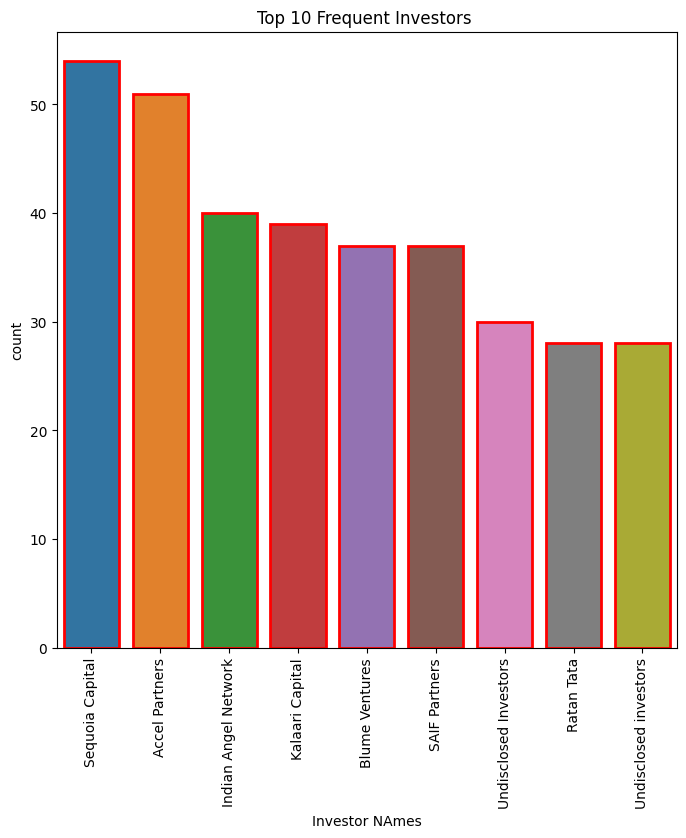

In [31]:
investors=df['investor'].str.split(",").explode().str.strip().value_counts().reset_index().head(10)
cleaned_investors=investors[investors['investor']!='']
fig=plt.subplots(figsize=(8,8))
ax=sns.barplot(data=cleaned_investors,x='investor',y='count',hue='investor',linewidth=2,edgecolor='red')
plt.title("Top 10 Frequent Investors ")
plt.xlabel("Investor NAmes")
plt.xticks(rotation=90)
plt.show()

__7. Count of startups funded each year/month.__

In [32]:
# first creating the Year and Date columns
df['Year']=df['Date'].dt.year
df['month']=df['Date'].dt.month

In [33]:
# getting overview of year and month wise startups counts
df.groupby(['Year','month'])['startup'].count()

Year  month
2015  4         61
      5         55
      6         84
      7         97
      8         98
      9         87
      10        93
      11        90
      12        88
2016  1        104
      2         99
      3         84
      4         77
      5         79
      6         97
      7         63
      8         87
      9         73
      10        80
      11        72
      12        72
2017  1         72
      2         48
      3         71
      4         71
      5         67
      6         65
      7         42
      8          5
Name: startup, dtype: int64

In [34]:
# only year wise startup counts
df.groupby(['Year'])['startup'].count()

Year
2015    753
2016    987
2017    441
Name: startup, dtype: int64

In [35]:
# converting above month and year wise count Multi-index series to Dataframe
monthly_counts = df.groupby(['Year', 'month'])['startup'].count().reset_index(name='Startup Counts')
monthly_counts

,Year,month,Startup Counts
0,2015,4,61
1,2015,5,55
2,2015,6,84
3,2015,7,97
4,2015,8,98
5,2015,9,87
6,2015,10,93
7,2015,11,90
8,2015,12,88
9,2016,1,104


In [36]:
monthly_counts['Yearmonth']=pd.to_datetime(monthly_counts[['Year','month']].assign(DAY=1))

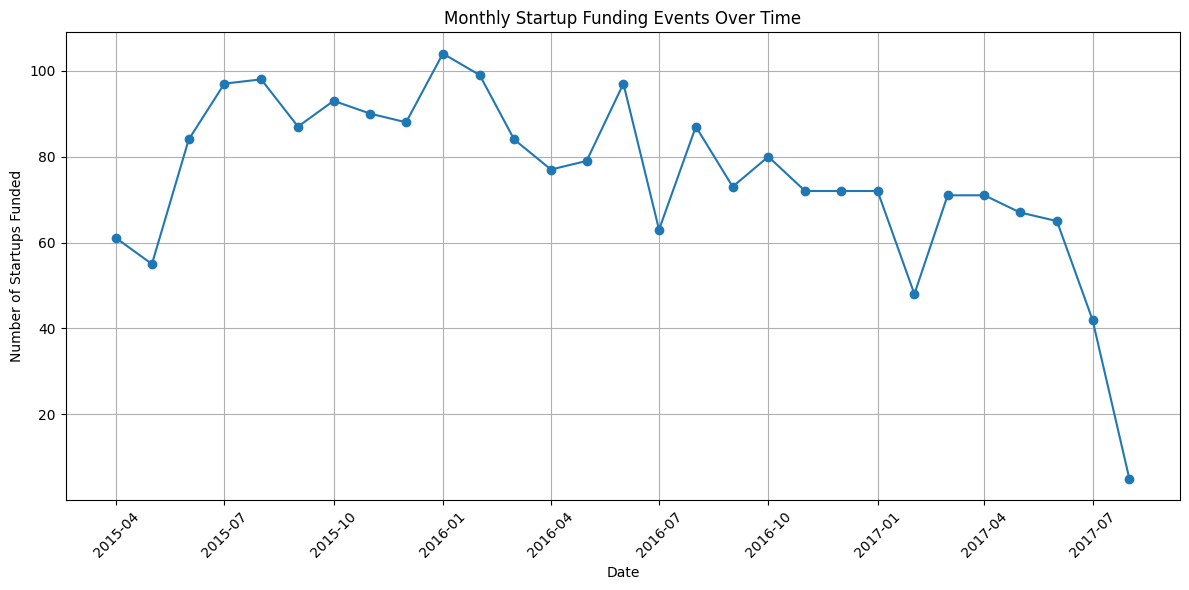

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts['Yearmonth'], monthly_counts['Startup Counts'], marker='o')
plt.title('Monthly Startup Funding Events Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Startups Funded')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

__8. Number of UNique Investors__

In [38]:
df['investor'].str.split(",").explode().str.strip().str.lower().nunique()

2365

__9.Number of unique startups.__

In [39]:
# similarly as we do in above 
len(set(df['startup'].str.split(",").sum()))

1863

In [40]:
# usnig nunique()for direct answer
df['startup'].nunique()

1863

__10. Top 10 sub-verticals funded most often.__

In [41]:
df['subvertical'].value_counts()

subvertical
Online Pharmacy                               8
Food Delivery Platform                        8
Online lending platform                       5
Online Learning Platform                      4
Fitness Mobile App                            3
                                             ..
Photography curation & Aggregator platform    1
SME Online Buying Hub                         1
Home Décor Product etailer                    1
Specialty Tea ETailer                         1
MF investment platform                        1
Name: count, Length: 1357, dtype: int64

In [42]:
df.groupby('subvertical')['amount'].sum().sort_values(ascending=False)

subvertical
ECommerce Marketplace                               14025.0
Mobile Wallet & ECommerce platform                  12045.0
App based cab aggregator                             2722.5
Cab Aggregator App                                   2145.0
Branded Budget Hotels Aggregator                     2062.5
                                                     ...   
Ad optimization Platform                                0.0
Online Car Repair and Servicing Booking platform        0.0
AI-based health content platform                        0.0
AI-based chatbot                                        0.0
eLearning & Skills Development plat                     0.0
Name: amount, Length: 1357, dtype: float64

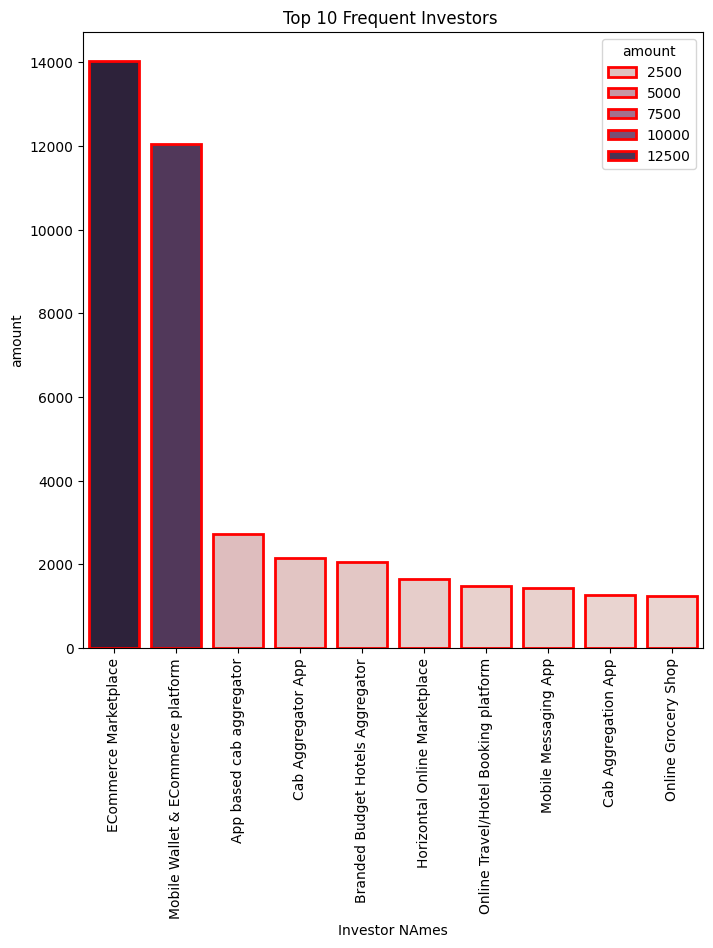

In [43]:
subvertical_top10=df.groupby('subvertical')['amount'].sum().sort_values(ascending=False).head(10).reset_index()
fig=plt.subplots(figsize=(8,8))
ax=sns.barplot(data=subvertical_top10,x='subvertical',y='amount',hue='amount',linewidth=2,edgecolor='red')
plt.title("Top 10 Frequent Investors ")
plt.xlabel("Investor NAmes")
plt.xticks(rotation=90)
plt.show()

__11. Highest single funding amount.__

In [44]:
df[df['amount']==df['amount'].max()]

,Date,startup,vertical,subvertical,city,investor,round,amount,Year,month
SNo,,,,,,,,,,
158,2017-05-18,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,11550.0,2017,5
294,2017-03-21,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,11550.0,2017,3


__12. Lowest (non-zero) funding amount.__

In [45]:
non_zero_funding=df[df['amount']!=0]
non_zero_funding[non_zero_funding['amount']==non_zero_funding['amount'].min()]

,Date,startup,vertical,subvertical,city,investor,round,amount,Year,month
SNo,,,,,,,,,,
439,2017-01-30,Maptags,Consumer Internet,Smart Online address tags,Bangalore,The Ten Minute Million,Seed Funding,0.1485,2017,1


__13. Number of startups with zero/unknown funding.__

In [46]:
zero_funding=df[df['amount']==0]
zero_funding.shape[0]

798

__14. Which cities receive the highest average funding per startup?__



In [47]:
highest_avg_per_startup=df.groupby('city')[['startup','amount']].agg({'startup':'count','amount':['mean','sum']})

In [48]:
highest_avg_per_startup=highest_avg_per_startup.sort_values(by=('amount','sum'),ascending=False)
highest_avg_per_startup.style.background_gradient(cmap='Greys')


__15. Most common funding round per city.__

In [49]:
## Group by both 'city' and 'round' and then count the number of occurrences# Group by both 'city' and 'round' and then count the number of occurrences
city_roundgroup=df.groupby(['city','round']).size().sort_values(ascending=False)

C:\Users\a\AppData\Local\Temp\ipykernel_11356\1039727793.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_roundgroup=df.groupby(['city','round']).size().sort_values(ascending=False)


In [50]:
# To make the output more readable, you can unstack the 'round' level
# This will create a table-like format with cities as rows and rounds as columns
city_round_table = city_roundgroup.unstack(fill_value=0)
city_round_table

round,Crowd Funding,Crowd funding,Debt Funding,Private Equity,PrivateEquity,Seed Funding,SeedFunding
city,,,,,,,
Agra,0,0,0,0,0,2,0
Ahmedabad,0,0,1,11,0,23,0
Bangalore,0,0,0,304,0,322,0
Bangalore / Palo Alto,0,0,0,0,0,1,0
Bangalore / SFO,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...
Udaipur,0,0,0,1,0,0,0
Udupi,0,0,0,1,0,1,0
Vadodara,0,0,0,2,0,7,0


__16. Most common funding round per sector(vertical).__

In [51]:
df.groupby(['vertical','round']).size().sort_values(ascending=False)

C:\Users\a\AppData\Local\Temp\ipykernel_11356\827090479.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['vertical','round']).size().sort_values(ascending=False)


vertical                              round         
Consumer Internet                     Seed Funding      466
                                      Private Equity    298
Technology                            Seed Funding      163
                                      Private Equity    150
eCommerce                             Private Equity     91
                                                       ... 
visual search and discovery platform  Debt Funding        0
                                      Private Equity      0
                                      PrivateEquity       0
Business intelligence & Analytics     Crowd funding       0
visual search and discovery platform  SeedFunding         0
Length: 5138, dtype: int64

__17.Year with the highest number of funding events.__

In [52]:
df.groupby("Year")['startup'].count()

Year
2015    753
2016    987
2017    441
Name: startup, dtype: int64

In [53]:
df['Year'].value_counts() # max 2016

Year
2016    987
2015    753
2017    441
Name: count, dtype: int64

__18. Month with most startup fundings overall.__

In [54]:
df['month'].value_counts() # Mostly funding in June (6)

month
6     246
4     209
7     202
5     201
8     190
1     176
10    173
11    162
12    160
9     160
3     155
2     147
Name: count, dtype: int64

__19. Which sectors(vertical) have the highest average funding?__

In [55]:
avg_funding_per_sector = df.groupby('vertical')['amount'].mean().sort_values(ascending=False).head(10)

In [56]:
avg_funding_per_sector

vertical
Online Marketplace                       5775.000
E-Commerce & M-Commerce platform         5610.000
Ecommerce Marketplace                    4125.000
Car Aggregator & Retail Mobile App       4125.000
Cab Aggregator                           3300.000
Online Classifieds                       1237.500
Logistics Solution Provider              1130.250
Hyper-local Grocery Delivery platform     990.000
Cab rental Mobile app                     928.125
Budget Hotel accommodation brand          825.000
Name: amount, dtype: float64

__20.How often are Private Equity vs Seed Funding used ?(round)__

In [57]:
df['round'].value_counts()

round
Seed Funding      1201
Private Equity     979
Debt Funding         1
Crowd funding        0
Crowd Funding        0
PrivateEquity        0
SeedFunding          0
Name: count, dtype: int64

<Axes: ylabel='count'>

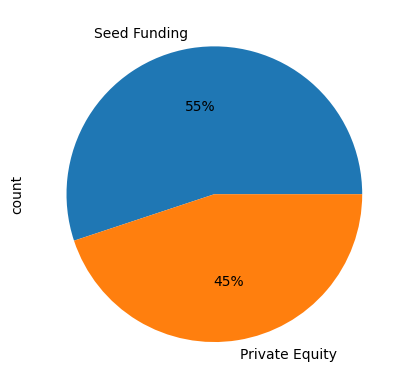

In [58]:
df['round'].value_counts().head(2).plot(kind='pie', autopct='%1.0f%%')

__21. Top 10 startups by total funding received.__

In [59]:
df["startupcleaned"]=df['startup'].str.strip().str.lower()
df['startupcleaned'].value_counts()

startupcleaned
swiggy                  7
urbanclap               6
jugnoo                  5
medinfi                 5
byju’s                  5
                       ..
localoye                1
policybazaar            1
robosoft                1
pastiwala               1
1mg (healthkartplus)    1
Name: count, Length: 1795, dtype: int64

In [60]:
startup_top10=df.groupby('startupcleaned')['amount'].sum().sort_values(ascending=False).head(10).reset_index(name='Total')
startup_top10

,startupcleaned,Total
0,paytm,17655.000
1,flipkart,12867.525
2,ola,8122.125
3,flipkart.com,5775.000
4,snapdeal,5775.000
5,ola cabs,4248.750
6,olacabs,3300.000
7,oyo rooms,2887.500
8,quikr,1897.500
9,delhivery,1773.750


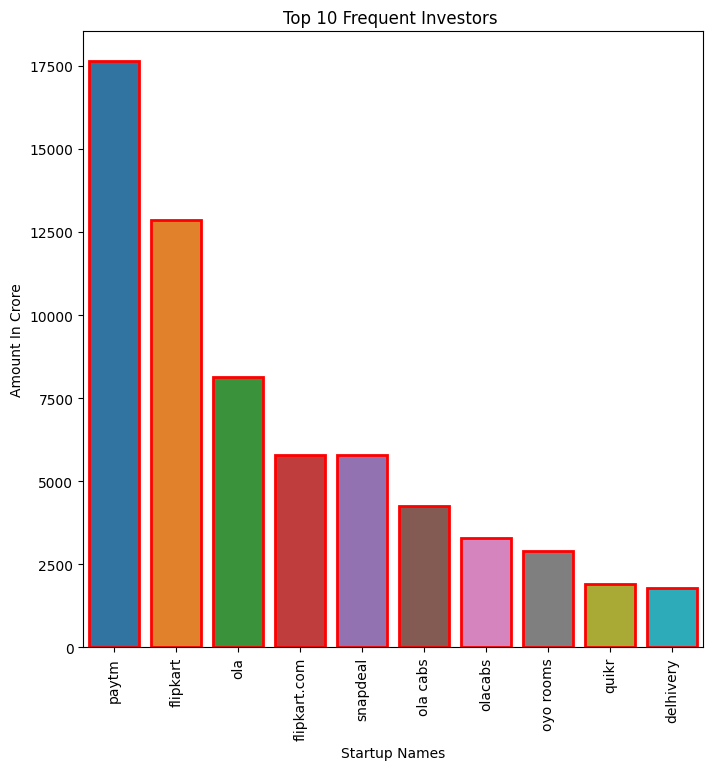

In [61]:
fig=plt.subplots(figsize=(8,8))
ax=sns.barplot(data=startup_top10,x='startupcleaned',y='Total',hue='startupcleaned',linewidth=2,edgecolor='red')
plt.title("Top 10 Frequent Investors ")
plt.xlabel("Startup Names")
plt.ylabel("Amount In Crore")
plt.xticks(rotation=90)
plt.show()

__22. Top 10 investors by number of startups invested in.__

In [62]:
df['cleaned_investor']=df['investor'].str.split(",")
df['cleaned_investor']=df['cleaned_investor'].apply(lambda x : [i.strip().lower() for i in x])

In [63]:
df['cleaned_investor']

SNo
0                                           [kae capital]
1                            [triton investment advisors]
2       [kashyap deorah, anand sankeshwar, deepak jain...
3       [kunal shah, letsventure, anupam mittal, hetal...
4                        [narottam thudi, shireesh palle]
                              ...                        
2196                                      [saif partners]
2197    [sumit jain, aprameya radhakrishna, alok goel,...
2198                                         [rainmatter]
2199                                        [the hr fund]
2200           [bessemer venture partners, saif partners]
Name: cleaned_investor, Length: 2181, dtype: object

In [64]:
df_exploded_version = df.explode("cleaned_investor")
df_exploded_version = df_exploded_version[df_exploded_version['cleaned_investor'] != '']

In [65]:
df_exploded_version['cleaned_investor']

SNo
0                      kae capital
1       triton investment advisors
2                   kashyap deorah
2                 anand sankeshwar
2                      deepak jain
                   ...            
2197              ashish dev kapur
2198                    rainmatter
2199                   the hr fund
2200     bessemer venture partners
2200                 saif partners
Name: cleaned_investor, Length: 4190, dtype: object

In [66]:
df_exploded_version.groupby('cleaned_investor')['startup'].nunique().sort_values(ascending=False).head(10)

"""nunique():  If an investor invests in the same startup multiple times, nunique() will only count that startup once.

Example with nunique(): If "Investor A" invests in "Startup X" twice and "Startup Y" once, nunique() would return 2 for "Investor A" (for "Startup X" and "Startup Y")"""

'nunique():  If an investor invests in the same startup multiple times, nunique() will only count that startup once.\n\nExample with nunique(): If "Investor A" invests in "Startup X" twice and "Startup Y" once, nunique() would return 2 for "Investor A" (for "Startup X" and "Startup Y")'

__23. Number of funding events per city.__

In [67]:
df.groupby("city")['startup'].nunique().sort_values(ascending=False).head(10)

city
Bangalore    523
Mumbai       387
New Delhi    339
Gurgaon      199
Pune          78
Hyderabad     70
Noida         69
Chennai       60
Ahmedabad     32
Jaipur        24
Name: startup, dtype: int64

__24. How many startups are funded multiple times?__

In [68]:
df['startup'].value_counts()[df['startup'].value_counts()>1]

startup
Swiggy       7
UrbanClap    6
Medinfi      5
Jugnoo       5
Byju’s       4
            ..
Ketto        2
MyPoolin     2
Zimmber      2
Ninjacart    2
Innoviti     2
Name: count, Length: 241, dtype: int64

__25.Startups with zero or missing city info.__

In [69]:
# Define a list of common placeholder values for missing/zero city info
missing_city_placeholders = ['', 'Unknown', 'unknown', 'None', 'none']

# Filter the DataFrame to find rows where 'city' is null or in the list of placeholders
# .isnull() checks for NaN values
# .isin() checks if the city value is in our list of placeholders
zero_or_missing_city_df = df[df['city'].isnull() | df['city'].isin(missing_city_placeholders)]

# Count the number of unique startups in the filtered DataFrame
startups_zero_city_count = zero_or_missing_city_df['startup'].nunique()

print(f"Number of startups with zero or missing city info: {startups_zero_city_count}\n")

Number of startups with zero or missing city info: 0



# __Investor COlumn Analysis__

__To find the Inverstor Funding in Startups__

__Analysis: Investor-Wise Total Funding (With Equal Split Per Deal)__

In the dataset, each row contains:

- A startup’s total funding amount  
- A list of investors (often more than one, separated by commas or stored as a list)

__We want to:__

1. Identify each individual investor from the list  
2. Split the funding amount **equally** among the investors for that funding round  
3. Calculate the **total funding per investor**

__Steps to Perform__

1. **Preprocess the Data**  
   - Handle missing values in the investor column  
   - Split the investor strings into lists (using `.str.split(',')` if needed)

2. **Calculate Per-Investor Funding**  
   - Count the number of investors in each row  
   - Divide the funding amount by the number of investors to get the per-investor share

3. **Use `explode()` to Unnest Investor Lists**  
   - Convert the list of investors in each row into individual rows using `df.explode()`

4. **Aggregate Total Funding by Investor**  
   - Group the exploded data by investor name  
   - Sum the `per-investor` funding amount across all rounds



In [70]:
df_for_investor=df.copy()
df_for_investor['investor']=df_for_investor['investor'].str.split(",")
df_for_investor['Investor_num']=df_for_investor['investor'].apply(len)
df_for_investor['amount_per_investor']=df_for_investor['amount']/ df_for_investor['Investor_num']
df_for_investor.head()


,Date,startup,vertical,subvertical,city,investor,round,amount,Year,month,startupcleaned,cleaned_investor,Investor_num,amount_per_investor
SNo,,,,,,,,,,,,,,
0,2017-08-01,TouchKin,Technology,Predictive Care Platform,Bangalore,[Kae Capital],Private Equity,10.7250,2017,8,touchkin,[kae capital],1,10.72500
1,2017-08-02,Ethinos,Technology,Digital Marketing Agency,Mumbai,[Triton Investment Advisors],Private Equity,0.0000,2017,8,ethinos,[triton investment advisors],1,0.00000
2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"[Kashyap Deorah, Anand Sankeshwar, Deepak Ja...",Seed Funding,0.0000,2017,8,leverage edu,"[kashyap deorah, anand sankeshwar, deepak jain...",7,0.00000
3,2017-08-02,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"[Kunal Shah, LetsVenture, Anupam Mittal, He...",Seed Funding,4.1250,2017,8,zepo,"[kunal shah, letsventure, anupam mittal, hetal...",4,1.03125
4,2017-08-02,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"[Narottam Thudi, Shireesh Palle]",Seed Funding,7.0125,2017,8,click2clinic,"[narottam thudi, shireesh palle]",2,3.50625


In [71]:
# Explode helps us to split the column that contains (list of Items) to Different rows (according to each item)
# explode() is used to transform a list-like column (e.g., a column where each row contains a list) 
# into multiple rows, one per list element.

# Think of it as “flattening” a column that contains lists.

df_for_investor=df_for_investor.explode('investor')
df_for_investor.head(10)

,Date,startup,vertical,subvertical,city,investor,round,amount,Year,month,startupcleaned,cleaned_investor,Investor_num,amount_per_investor
SNo,,,,,,,,,,,,,,
0,2017-08-01,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,10.725,2017,8,touchkin,[kae capital],1,10.72500
1,2017-08-02,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,0.000,2017,8,ethinos,[triton investment advisors],1,0.00000
2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,Kashyap Deorah,Seed Funding,0.000,2017,8,leverage edu,"[kashyap deorah, anand sankeshwar, deepak jain...",7,0.00000
2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,Anand Sankeshwar,Seed Funding,0.000,2017,8,leverage edu,"[kashyap deorah, anand sankeshwar, deepak jain...",7,0.00000
2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,Deepak Jain,Seed Funding,0.000,2017,8,leverage edu,"[kashyap deorah, anand sankeshwar, deepak jain...",7,0.00000
2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,Sadashiva NT,Seed Funding,0.000,2017,8,leverage edu,"[kashyap deorah, anand sankeshwar, deepak jain...",7,0.00000
2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,Arjun Mehta,Seed Funding,0.000,2017,8,leverage edu,"[kashyap deorah, anand sankeshwar, deepak jain...",7,0.00000
2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,Satish Kaul,Seed Funding,0.000,2017,8,leverage edu,"[kashyap deorah, anand sankeshwar, deepak jain...",7,0.00000
2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,Anindya Ghose,Seed Funding,0.000,2017,8,leverage edu,"[kashyap deorah, anand sankeshwar, deepak jain...",7,0.00000


In [72]:
requirement=df_for_investor.groupby("investor")['amount_per_investor'].sum().sort_values(ascending=False)
requirement.head()

investor
SoftBank Group                              12267.75
Steadview Capital and existing investors     5775.00
Microsoft                                    3850.00
 eBay                                        3850.00
 Tencent Holdings                            3850.00
Name: amount_per_investor, dtype: float64

In [98]:
top_10_inverstors=pd.DataFrame(requirement.head(10))
top_10_inverstors 

,amount_per_investor
investor,
SoftBank Group,12267.75000
Steadview Capital and existing investors,5775.00000
Microsoft,3850.00000
eBay,3850.00000
Tencent Holdings,3850.00000
Tiger Global,3087.90625
Alibaba,3025.00000
Alibaba Group,2805.00000
Ant Financial,2805.00000


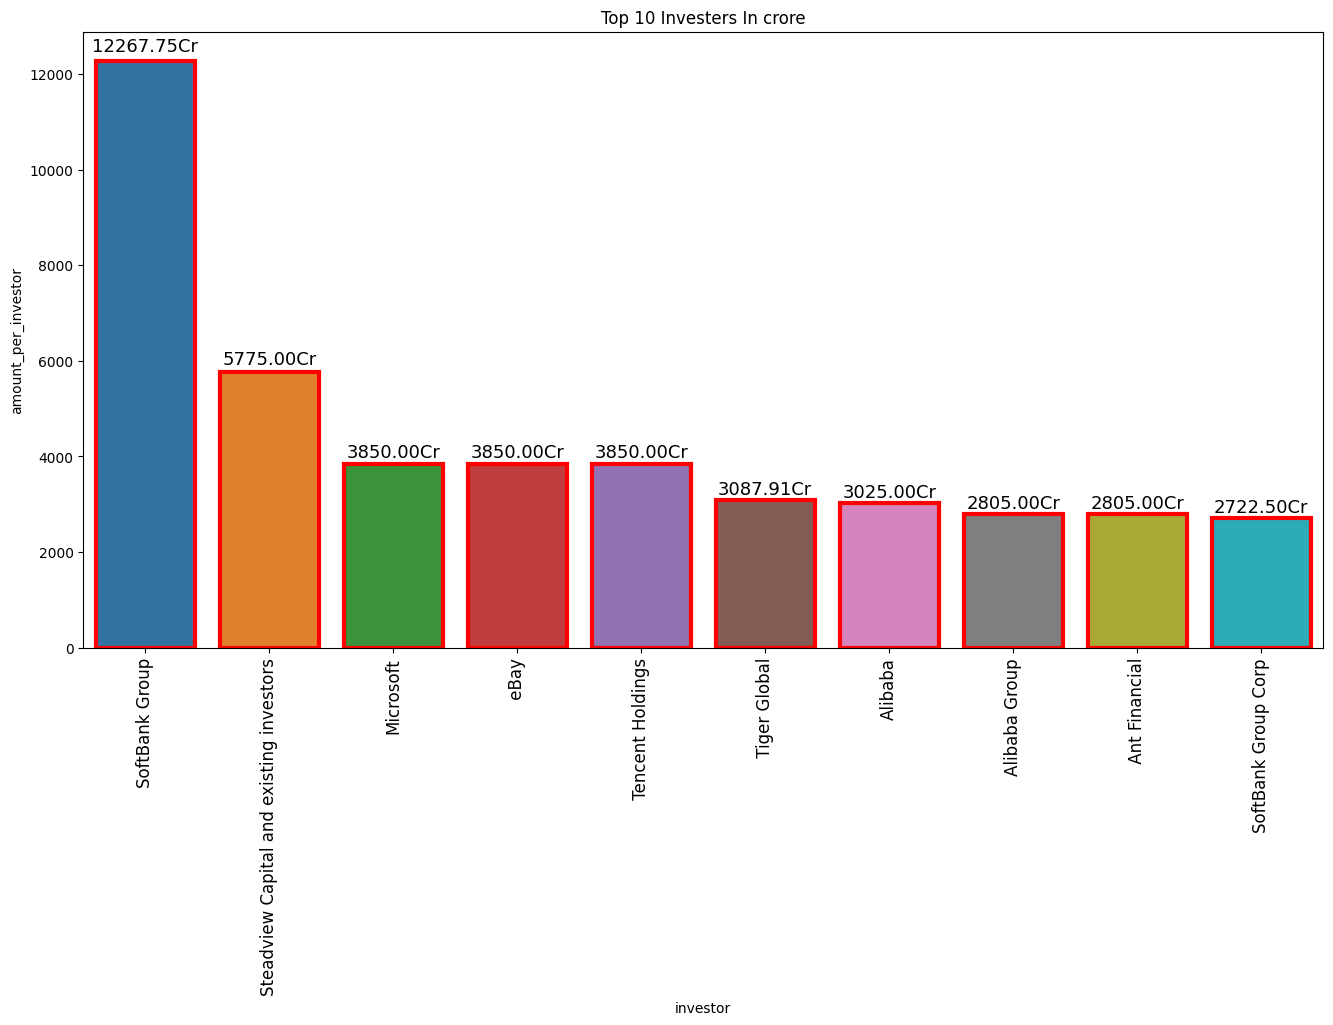

In [99]:
plt.figure(figsize=(16,8))
plt.title("Top 10 Investers In crore")

ax=sns.barplot(data=top_10_inverstors,edgecolor='red',linewidth=3,x='investor',y='amount_per_investor',hue='investor')

plt.xticks(rotation=90,fontsize=12)
for i in ax.patches:
    height=i.get_height()
    ax.text(
        i.get_x() + i.get_width()/2 ,
        height + 0.01*height,
        f'{height:.2f}Cr',
        fontsize=13,
        color='black',
        ha='center',
        va='bottom'
    )

In [77]:
# least 10 Investors 
least_10=pd.DataFrame(requirement[requirement>0]).sort_values(by="amount_per_investor")
least_10

,amount_per_investor
investor,
Saurab Paruthi,0.0825
Lalit Mangal,0.0825
Arihant Patni,0.0825
Singapore Angel Network.,0.0825
Samir Bangara,0.0825
...,...
Microsoft,3850.0000
eBay,3850.0000
Tencent Holdings,3850.0000


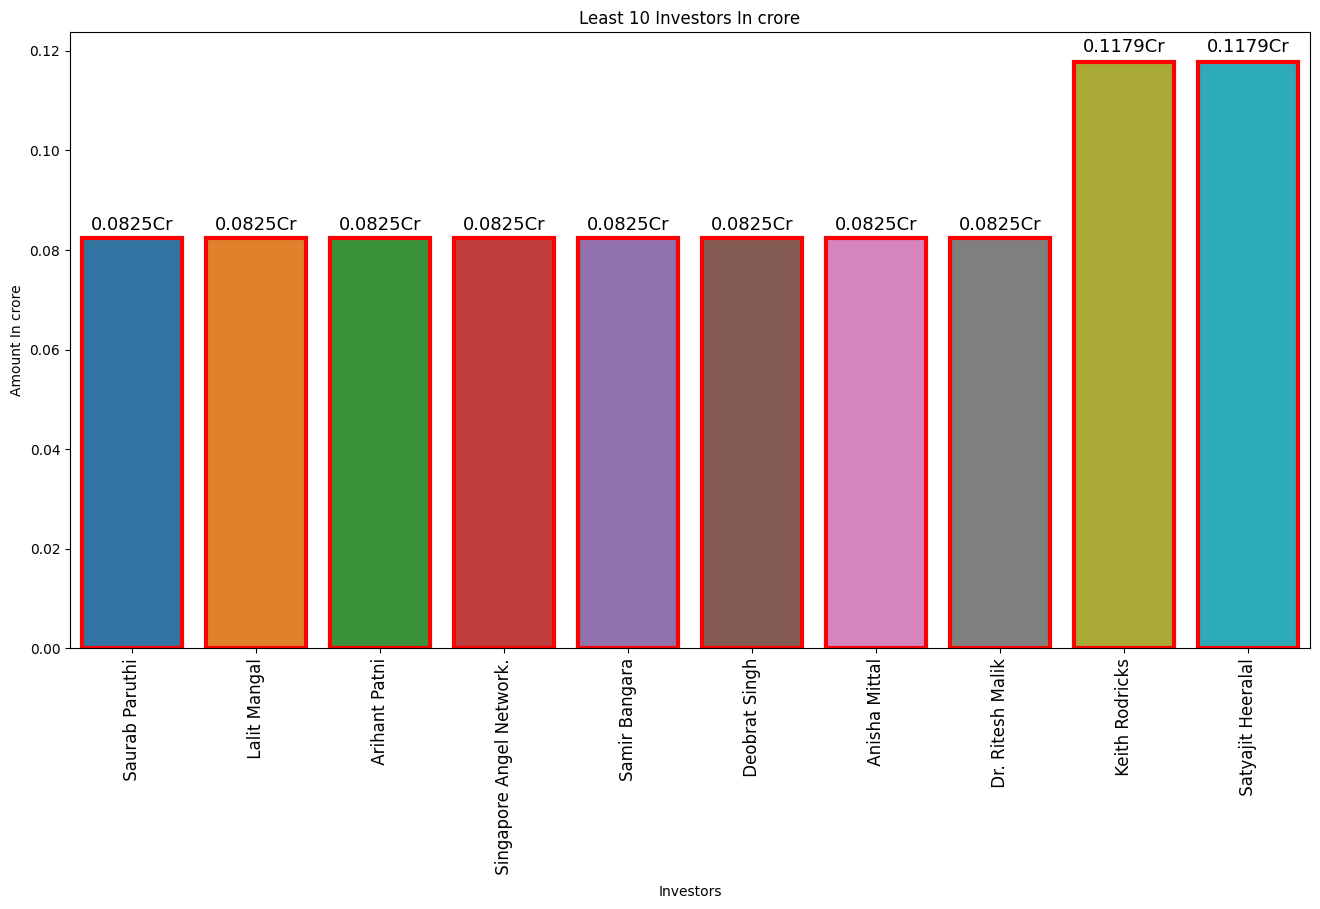

In [78]:
plt.figure(figsize=(16,8))
plt.title("Least 10 Investors In crore")
plt.ylabel("Amount In crore")
plt.xlabel("Investors")
ax=sns.barplot(data=least_10.head(10),edgecolor='red',linewidth=3,x='investor',y='amount_per_investor',hue='investor')

plt.xticks(rotation=90,fontsize=12)
for i in ax.patches:
    height=i.get_height()

    ax.text(
        i.get_x() + i.get_width()/2 ,
        height + 0.01*height,
        f'{height:.4f}Cr',
        fontsize=13,
        color='black',
        ha='center',
        va='bottom'
   )



# Single Investors Analysis

__find for =>  IDG Ventures__

In [79]:
# first Make List of all the Investors 
# then convert it to Set for (removing Duplicates)
# then sort it using sorted() method
# way to get the Unique (Investor list) from column (that have ELements in form of list)
x=sorted(set(df['investor'].str.split(",").sum()))


In [80]:
x[0:10]

['',
 ' & Others',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 500 Startups & Other HNIs']

In [81]:
len(x)
# TOtal number of Unique Investors

2703

In [107]:
# As we can see above method provide us the unique investors but there may be some errors because (S johr) and (s johr) both are same so we haev to use such lower and strip functions to remove reveal those patterns

len(sorted(set(df['investor'].str.split(",").apply(lambda x: [i.strip().lower() for i in x if i!=''] ).sum())))

2364

In [82]:
# Lets find for specific investor from above list
# use .contains() to find the rows Which have That Investor Name
Investor_found=df[df['investor'].str.contains(" IDG Ventures")].loc[:,['Date','startup',"city",'investor','amount']]
Investor_found

,Date,startup,city,investor,amount
SNo,,,,,
291,2017-03-16,POPxo,New Delhi,"GREE Ventures, Kalaari Capital and IDG Venture...",25.575
339,2017-02-13,Sigtuple,Bangalore,"Accel Partners, IDG Ventures, Endiya Partners,...",47.850
538,2016-11-14,Active.ai,Singapore,"Kalaari Capital, IDG Ventures India",24.750
542,2016-11-15,PlaySimple,Bangalore,"SAIF Partners, IDG Ventures India",33.000
722,2016-09-23,CloudCherry,Chennai,"Vertex Ventures, Cisco Ventures, IDG Ventures",49.500
833,2016-07-04,Curefit,Bangalore,"Accel Partners, IDG Ventures, Kalaari Capital",123.750
863,2016-07-13,RentMojo,Bangalore,"Accel Partners, IDG Ventures India",41.250
1000,2016-05-04,Lenskart,New Delhi,"International Finance Corp, TPG Growth, Adveq ...",495.000
1260,2016-02-08,Xpressbees,Pune,"SAIF Partners, IDG Ventures India, Vertex Vent...",103.125


In [83]:
# grouping the startup column with amount because the single Investor may invest in same Company(startup) again
# then sum the amount according to the startups name 
Investor_found.groupby('startup')['amount'].sum().sort_values(ascending=False)

startup
Lenskart                 495.000
Curefit                  123.750
Xpressbees               103.125
FirstCry.com              82.500
CloudCherry               49.500
Sigtuple                  47.850
RentMojo                  41.250
Aasaanjobs                41.250
PlaySimple                33.000
POPxo                     25.575
Active.ai                 24.750
Cloudcherry Analytics      8.250
Tripoto                    0.000
Name: amount, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Lenskart'),
  Text(1, 0, 'Curefit'),
  Text(2, 0, 'Xpressbees'),
  Text(3, 0, 'FirstCry.com'),
  Text(4, 0, 'CloudCherry'),
  Text(5, 0, 'Sigtuple'),
  Text(6, 0, 'RentMojo'),
  Text(7, 0, 'Aasaanjobs'),
  Text(8, 0, 'PlaySimple'),
  Text(9, 0, 'POPxo')])

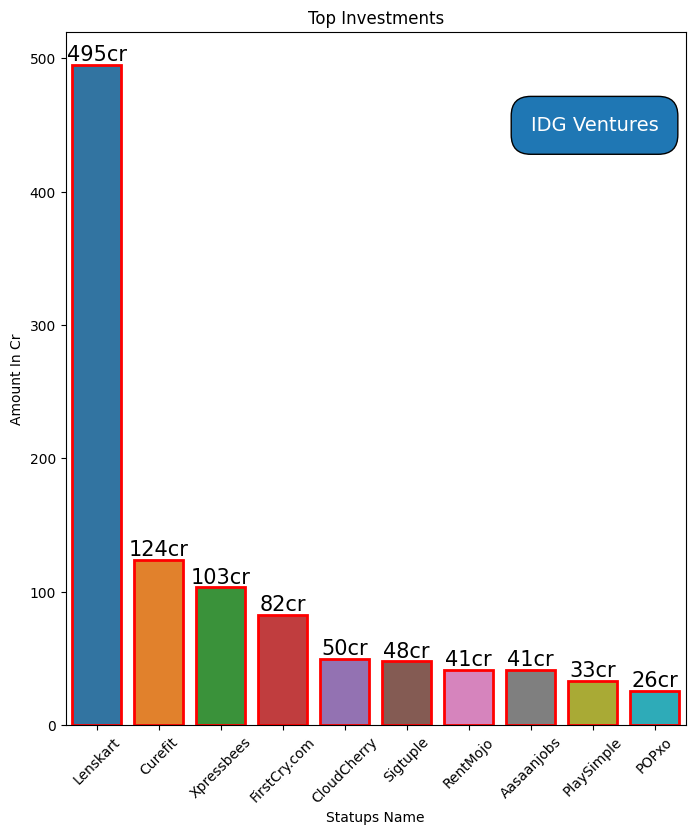

In [112]:
# plotting top 10 investments by  IDG Ventures in startups
fig=plt.figure(figsize=(8,9))
import seaborn as sns
req=df[df['investor'].str.contains(" IDG Ventures")].groupby('startup')['amount'].sum().sort_values(ascending=False).head(10).reset_index()
ax=sns.barplot(data=req,x='startup',y='amount',hue='startup',linewidth=2,edgecolor='red')

ax.set_title("Top Investments")
ax.set_ylabel("Amount In Cr")
ax.set_xlabel("Statups Name")
for i in ax.patches:
    height=i.get_height()
    ax.text(
        i.get_x()+i.get_width()/2,
        height,
        f'{height:.0f}cr',
        va='bottom',ha='center',
        fontsize=15
    )
ax.text(
    7,                        # x-coordinate (slightly outside the bar)
    max(req['amount']) * 0.9,         # y-coordinate (90% of max height)
    "IDG Ventures",             # Your custom label
    fontsize=14,
    color='white',
    bbox=dict( edgecolor='black', boxstyle='round,pad=1.0')
)

plt.xticks(rotation=45)

vertical
Consumer Internet                  4
Technology                         4
eCommerce                          2
ECommerce                          1
global community for travellers    1
CRM / Analytics platform           1
Name: count, dtype: int64


<Axes: ylabel='count'>

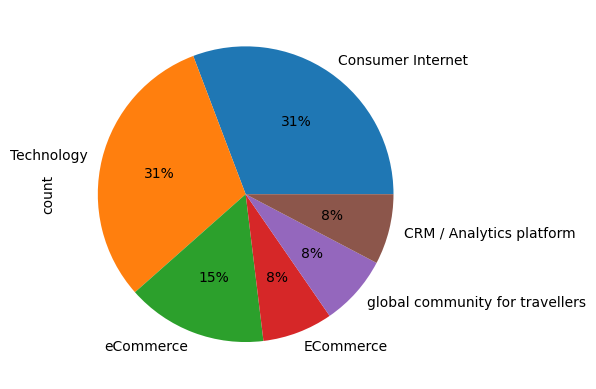

In [85]:
# To get the In which sector the Invester Invests (Its interest )
# How many times investor invest in particular sector
print(df[df['investor'].str.contains(" IDG Ventures")]['vertical'].value_counts())
df[df['investor'].str.contains(" IDG Ventures")]['vertical'].value_counts().plot(kind='pie', autopct=lambda p: '{:.0f}%'.format(p))


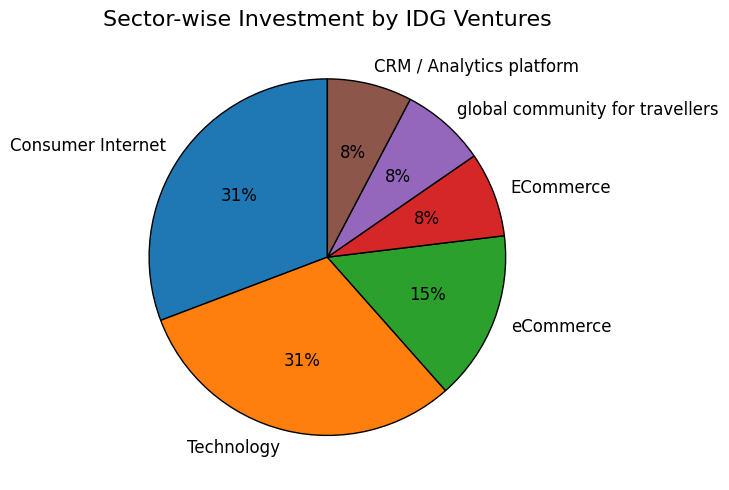

In [86]:
# more Better Vesion of Above
plt.figure(figsize=(8, 5))  # Increase the figure size
plt.title("Sector-wise Investment by IDG Ventures", fontsize=16)  # Add a title with larger font size

# Plot the pie chart with better spacing and larger font sizes
df[df['investor'].str.contains(" IDG Ventures")]['vertical'].value_counts().plot(
    kind='pie',
    autopct=lambda p: '{:.0f}%'.format(p),
    textprops={'fontsize': 12},  
    startangle=90,  
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'}  
)

plt.ylabel('')  # Remove the default y-axis label
plt.tight_layout() 
plt.show()

                                  amount
vertical                                
CRM / Analytics platform           8.250
Consumer Internet                231.825
ECommerce                        103.125
Technology                       155.100
eCommerce                        577.500
global community for travellers    0.000


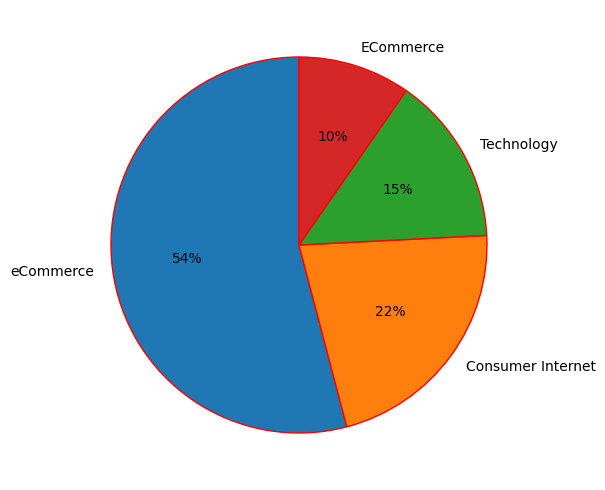

In [87]:
# similarly how much investor INvest in specific Sector
print(df[df['investor'].str.contains(" IDG Ventures")].groupby("vertical")['amount'].sum().to_frame())

fig=plt.figure(figsize=(8,5))
df[df['investor'].str.contains(" IDG Ventures")].groupby("vertical")['amount'].sum().sort_values(ascending=False).head(4).plot(kind='pie',autopct=lambda p:'{:.0f}%'.format(p),startangle=90,
                                                                                          wedgeprops={'linewidth':1,'edgecolor':'red'})
plt.ylabel("")
plt.tight_layout()
plt.show()

C:\Users\a\AppData\Local\Temp\ipykernel_11356\2638547335.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['investor'].str.contains(" IDG Ventures")].groupby('round')['amount'].sum().sort_values(ascending=False).head(4).plot(kind='pie',autopct=lambda p:'{:.0f}%'.format(p) if p>0 else '')


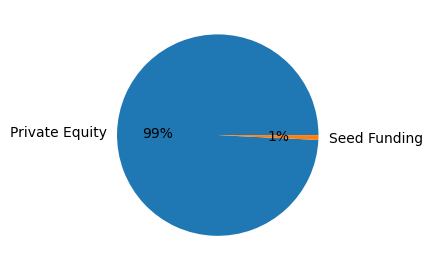

In [88]:
# for Investor Round 
fig=plt.figure(figsize=(4,3.5))
df[df['investor'].str.contains(" IDG Ventures")].groupby('round')['amount'].sum().sort_values(ascending=False).head(4).plot(kind='pie',autopct=lambda p:'{:.0f}%'.format(p) if p>0 else '')
plt.ylabel("")
plt.tight_layout()
plt.show()

<Axes: xlabel='Year', ylabel='amount'>

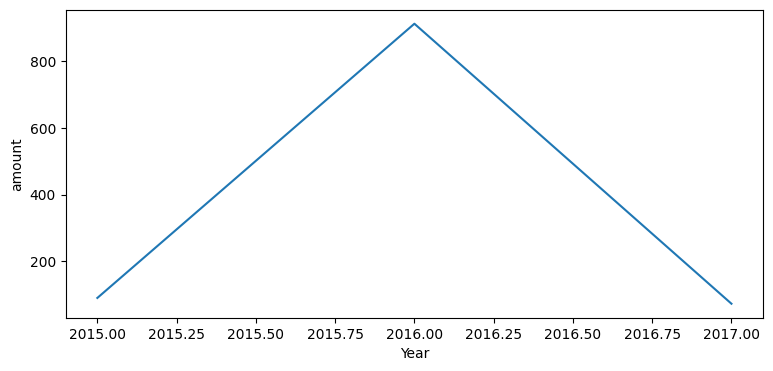

In [89]:
# Year wise analysis about particular Investor
date_wise_investor=df[df['investor'].str.contains(" IDG Ventures")].sort_values(by='Date')
date_wise_investor['Year']=date_wise_investor['Date'].dt.year
fg,ax=plt.subplots(figsize=(9,4))
sns.lineplot(data=date_wise_investor.groupby("Year")['amount'].sum())
# date_wise_investor.groupby('Year')['amount'].sum().plot()

# __Overall Analysis__

1. __Total Amount Funded in our India Startups System__

In [90]:
df['amount'].sum()

np.float64(140812.671516)

2. __Month WIse Analysis of amount Funded in Startups per Year__

In [93]:
month_analysis=df.copy()
month_analysis['month']=month_analysis['Date'].dt.month
month_analysis['year']=month_analysis['Date'].dt.year
month_analysis.groupby(['year','month'])['amount'].sum()

year  month
2015  4         8080.875000
      5         2641.113750
      6         4302.325500
      7        13048.670250
      8         8776.482000
      9        12123.540000
      10        2103.428250
      11        7399.878750
      12        2523.287250
2016  1         5774.010000
      2         2734.796625
      3         2553.883266
      4         2095.005000
      5         2803.680000
      6         1647.021750
      7         1926.762750
      8         4406.234250
      9         1991.228250
      10        1958.946000
      11        2144.975250
      12        1544.754750
2017  1         2089.176375
      2         2433.411750
      3        18680.318250
      4         6042.258750
      5        14738.369250
      6         2842.818000
      7         1383.558000
      8           21.862500
Name: amount, dtype: float64

<Axes: xlabel='year,month'>

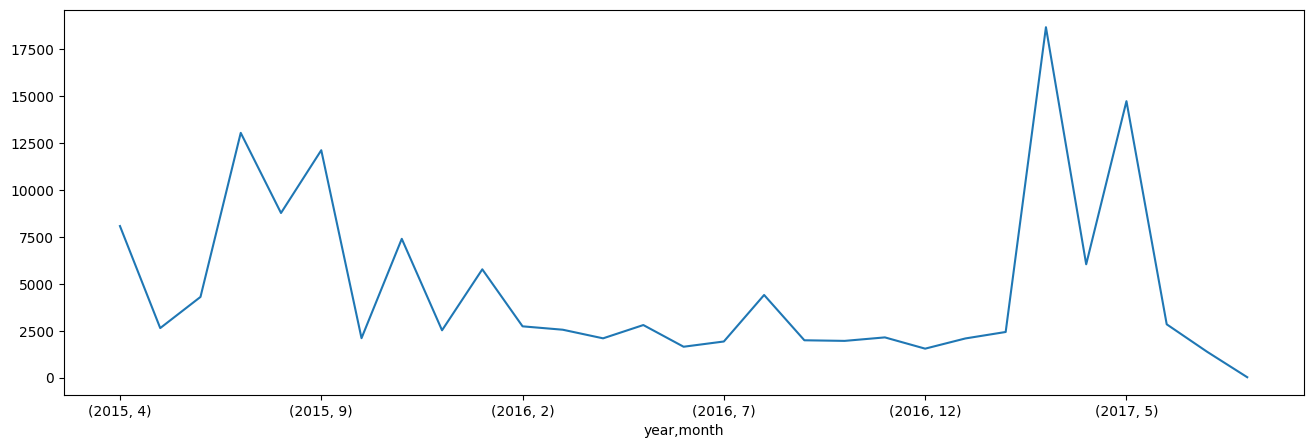

In [94]:
plt.subplots(figsize=(16,5))
month_analysis.groupby(['year','month'])['amount'].sum().plot()

4. __Month WIse Analysis of how many Times Funded in Startups Per year__

In [95]:
month_analysis.groupby(['year','month'])['startup'].count()

year  month
2015  4         61
      5         55
      6         84
      7         97
      8         98
      9         87
      10        93
      11        90
      12        88
2016  1        104
      2         99
      3         84
      4         77
      5         79
      6         97
      7         63
      8         87
      9         73
      10        80
      11        72
      12        72
2017  1         72
      2         48
      3         71
      4         71
      5         67
      6         65
      7         42
      8          5
Name: startup, dtype: int64

In [96]:
df[(df['Date'].dt.year==2015) & (df['Date'].dt.month==4)].shape

(61, 12)

<Axes: xlabel='year,month'>

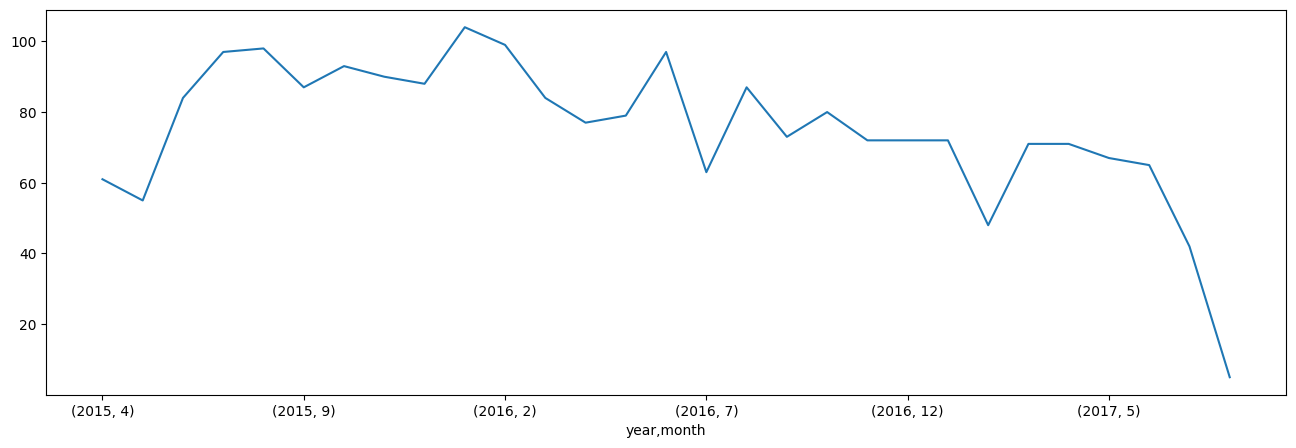

In [97]:
plt.subplots(figsize=(16,5))
month_analysis.groupby(['year','month'])['startup'].count().plot()

# __Analysis About Startups__

__top 10 Startups invested__

In [118]:
# applying strip and title functionto startup column
df['startup']=df['startup'].apply(lambda x: x.strip().title())

In [119]:
# we have Done it above 
df.groupby("startup")['amount'].sum().sort_values(ascending=False)

startup
Paytm           17655.000
Flipkart        12867.525
Ola              8122.125
Flipkart.Com     5775.000
Snapdeal         5775.000
                  ...    
Zinghr              0.000
Ziffity             0.000
Zeroinfy            0.000
Ambee               0.000
Ampere              0.000
Name: amount, Length: 1795, dtype: float64

In [121]:
# similarly for lower 10 
# we have Done it above 
df[df['amount']!=0].groupby("startup")['amount'].sum().sort_values(ascending=True)

startup
Maptags              0.148500
33Coupons            0.165000
Soundsurround        0.185625
Strike               0.185625
Gamooz               0.185625
                     ...     
Snapdeal          5775.000000
Flipkart.Com      5775.000000
Ola               8122.125000
Flipkart         12867.525000
Paytm            17655.000000
Name: amount, Length: 1167, dtype: float64

# __Analysis about specific Startups__
__Find it for Lenskart__

__Highest INvested Amount In Lenskart Startup__

In [125]:
particular_startup=df[df['amount']!=0][df['startup']=='Lenskart']
particular_startup

C:\Users\a\AppData\Local\Temp\ipykernel_11356\1635255404.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  particular_startup=df[df['amount']!=0][df['startup']=='Lenskart']


,Date,startup,vertical,subvertical,city,investor,round,amount,Year,month,startupcleaned,cleaned_investor
SNo,,,,,,,,,,,,
386,2017-01-10,Lenskart,eCommerce,Online eyewear retailer,Bangalore,Ronnie Screwvala,Private Equity,28.875,2017,1,lenskart,[ronnie screwvala]
1000,2016-05-04,Lenskart,eCommerce,Eyewear & Accessories etailer,New Delhi,"International Finance Corp, TPG Growth, Adveq ...",Private Equity,495.000,2016,5,lenskart,"[international finance corp, tpg growth, adveq..."


In [127]:
# maximum Amount Funded To Lenskart 
particular_startup[particular_startup['amount']==particular_startup['amount'].max()]

,Date,startup,vertical,subvertical,city,investor,round,amount,Year,month,startupcleaned,cleaned_investor
SNo,,,,,,,,,,,,
1000,2016-05-04,Lenskart,eCommerce,Eyewear & Accessories etailer,New Delhi,"International Finance Corp, TPG Growth, Adveq ...",Private Equity,495.0,2016,5,lenskart,"[international finance corp, tpg growth, adveq..."


__max Amount Invested In Startup__

In [193]:
particular_startup['amount'].max()

np.float64(495.0)

In [ ]:
# Which INvestors Funded To This Startup
particular_startup.explode('cleaned_investor')

,Date,startup,vertical,subvertical,city,investor,round,amount,Year,month,startupcleaned,cleaned_investor
SNo,,,,,,,,,,,,
386,2017-01-10,Lenskart,eCommerce,Online eyewear retailer,Bangalore,Ronnie Screwvala,Private Equity,28.875,2017,1,lenskart,ronnie screwvala
1000,2016-05-04,Lenskart,eCommerce,Eyewear & Accessories etailer,New Delhi,"International Finance Corp, TPG Growth, Adveq ...",Private Equity,495.000,2016,5,lenskart,international finance corp
1000,2016-05-04,Lenskart,eCommerce,Eyewear & Accessories etailer,New Delhi,"International Finance Corp, TPG Growth, Adveq ...",Private Equity,495.000,2016,5,lenskart,tpg growth
1000,2016-05-04,Lenskart,eCommerce,Eyewear & Accessories etailer,New Delhi,"International Finance Corp, TPG Growth, Adveq ...",Private Equity,495.000,2016,5,lenskart,adveq management
1000,2016-05-04,Lenskart,eCommerce,Eyewear & Accessories etailer,New Delhi,"International Finance Corp, TPG Growth, Adveq ...",Private Equity,495.000,2016,5,lenskart,idg ventures
1000,2016-05-04,Lenskart,eCommerce,Eyewear & Accessories etailer,New Delhi,"International Finance Corp, TPG Growth, Adveq ...",Private Equity,495.000,2016,5,lenskart,ratan tata
1000,2016-05-04,Lenskart,eCommerce,Eyewear & Accessories etailer,New Delhi,"International Finance Corp, TPG Growth, Adveq ...",Private Equity,495.000,2016,5,lenskart,kris gopalakrishnan


__Getting Top 10 investors Invested In THat Startup According to The Number of investors in INvestor list__

__Like if list contains 5 INvestors Group and invested 500 Cr in Single Startup To Obtain The Equal Amount We divide Amount with number of investors (500Cr / 5 )__

In [180]:
particular_startup['Investor_no']=particular_startup['investor'].str.split(",").apply(len)
particular_startup['Amount_per_investor']=particular_startup['amount']/particular_startup['Investor_no']
particular_startup=particular_startup.explode("cleaned_investor").sort_values(by='Amount_per_investor',ascending=False)

In [181]:
particular_startup

,Date,startup,vertical,subvertical,city,investor,round,amount,Year,month,startupcleaned,cleaned_investor,Investor_no,Amount_per_investor
SNo,,,,,,,,,,,,,,
1000,2016-05-04,Lenskart,eCommerce,Eyewear & Accessories etailer,New Delhi,"International Finance Corp, TPG Growth, Adveq ...",Private Equity,495.000,2016,5,lenskart,international finance corp,6,82.500
1000,2016-05-04,Lenskart,eCommerce,Eyewear & Accessories etailer,New Delhi,"International Finance Corp, TPG Growth, Adveq ...",Private Equity,495.000,2016,5,lenskart,kris gopalakrishnan,6,82.500
1000,2016-05-04,Lenskart,eCommerce,Eyewear & Accessories etailer,New Delhi,"International Finance Corp, TPG Growth, Adveq ...",Private Equity,495.000,2016,5,lenskart,adveq management,6,82.500
1000,2016-05-04,Lenskart,eCommerce,Eyewear & Accessories etailer,New Delhi,"International Finance Corp, TPG Growth, Adveq ...",Private Equity,495.000,2016,5,lenskart,tpg growth,6,82.500
1000,2016-05-04,Lenskart,eCommerce,Eyewear & Accessories etailer,New Delhi,"International Finance Corp, TPG Growth, Adveq ...",Private Equity,495.000,2016,5,lenskart,idg ventures,6,82.500
1000,2016-05-04,Lenskart,eCommerce,Eyewear & Accessories etailer,New Delhi,"International Finance Corp, TPG Growth, Adveq ...",Private Equity,495.000,2016,5,lenskart,ratan tata,6,82.500
386,2017-01-10,Lenskart,eCommerce,Online eyewear retailer,Bangalore,Ronnie Screwvala,Private Equity,28.875,2017,1,lenskart,ronnie screwvala,1,28.875


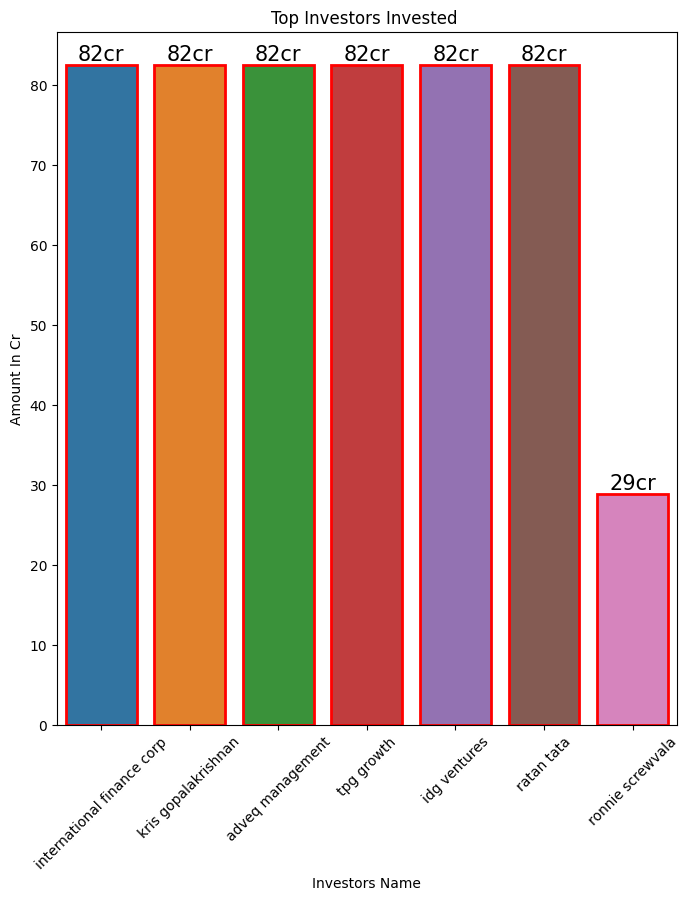

In [184]:
# plotting top 10 investments by  IDG Ventures in startups
fig=plt.figure(figsize=(8,9))

ax=sns.barplot(data=particular_startup,x='cleaned_investor',y='Amount_per_investor',hue='cleaned_investor',linewidth=2,edgecolor='red')

ax.set_title("Top Investors Invested ")
ax.set_ylabel("Amount In Cr")
ax.set_xlabel("Investors Name")
for i in ax.patches:
    height=i.get_height()
    ax.text(
        i.get_x()+i.get_width()/2,
        height,
        f'{height:.0f}cr',
        va='bottom',ha='center',
        fontsize=15
    )

plt.xticks(rotation=45)
plt.show()

In [141]:
particular_startup.explode("cleaned_investor").groupby(['Date','startup','cleaned_investor'])['amount'].count()

Date        startup   cleaned_investor          
2016-05-04  Lenskart  adveq management              1
                      idg ventures                  1
                      international finance corp    1
                      kris gopalakrishnan           1
                      ratan tata                    1
                      tpg growth                    1
2017-01-10  Lenskart  ronnie screwvala              1
Name: amount, dtype: int64

In [145]:
x=particular_startup.explode("cleaned_investor").groupby(['Date','startup','cleaned_investor'])['amount'].count().reset_index()

In [ ]:
# investor Numbers 
x.loc[:,['Date','cleaned_investor']].groupby("Date").count()

,cleaned_investor
Date,
2016-05-04,6
2017-01-10,1


__Year Wise Analysis__

In [156]:
particular_startup.groupby('Year')["amount"].sum()

Year
2016    495.000
2017     28.875
Name: amount, dtype: float64

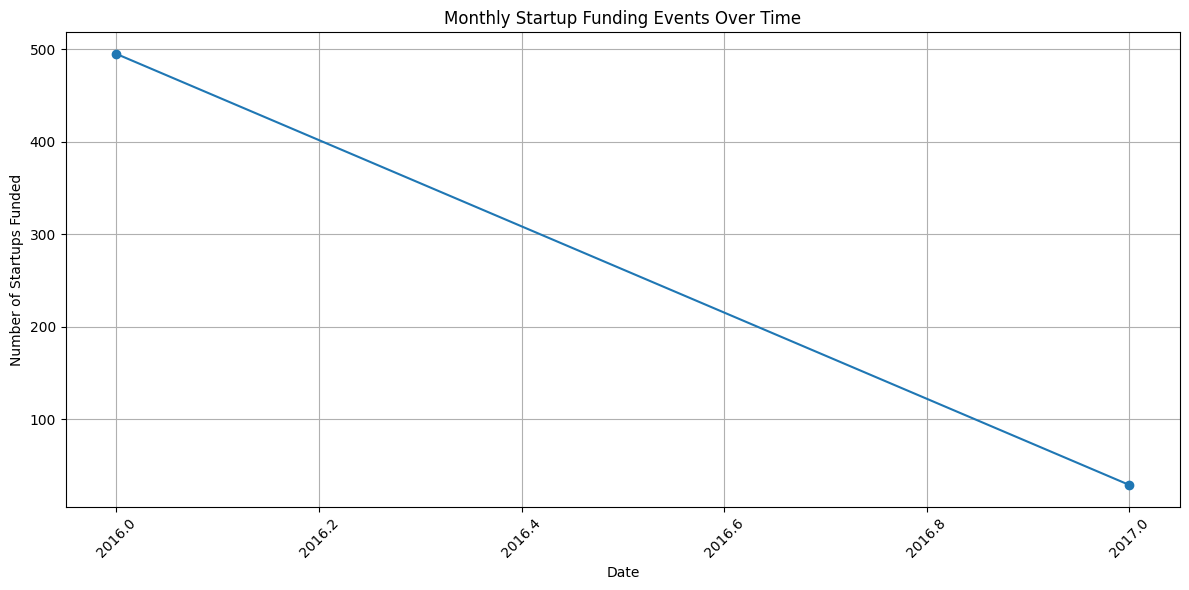

In [159]:
year_wise=particular_startup.groupby('Year')["amount"].sum().reset_index(name='Total Amount In (Cr)')
plt.figure(figsize=(12, 6))
plt.plot(year_wise['Year'], year_wise['Total Amount In (Cr)'], marker='o')
plt.title('Monthly Startup Funding Events Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Startups Funded')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

__Most Invested Year__

In [192]:
particular_startup.groupby('Year')["amount"].sum().reset_index(name='Total Amount In (Cr)').sort_values(by='Total Amount In (Cr)',ascending=False)['Year'][0]

np.int32(2016)